# Mapreader Workshop - June 7th-8th 2023

----

MapReader accepts different types of map images as input. We're focusing today on re-using already georeferenced maps that are available as XYZ tile layers from libraries, archives, or other services.

# Download

MapReader’s ``Download`` subpackage is used to download maps stored on as XYZ tile layers on a tile server. It contains two classes for downloading maps:

1. ``SheetDownloader`` - This can be used to download map sheets and relies on information provided in a metadata json file.

2. ``Downloader`` - This is used to download maps using polygons and can be used even if you don’t have a metadata json file.

In this workshop, we will use the ``SheetDownloader`` along with metadata stored in the ``NLS_metadata`` directory of the mapreader repository.

## Import the ``SheetDownloader`` and create your ``my_ts`` object.

In [1]:
from mapreader import SheetDownloader

In [2]:
metadata_path="../NLS_metadata/metadata_OS_One_Inch_GB_WFS_light.json"
download_url="https://geo.nls.uk/maps/os/1inch_2nd_ed/{z}/{x}/{y}.png"

In [3]:
my_ts = SheetDownloader(metadata_path, download_url)

[INFO] Metadata file has 480 item(s).


You can view the boundaries of the map sheets included in your metadata by calling the ``.plot_all_metadata_on_map()`` method:

In [ ]:
my_ts.plot_all_metadata_on_map()

The numbers shown are the [Web Feature Service (WFS)](https://en.wikipedia.org/wiki/Web_Feature_Service) ID numbers of the maps.


## Select maps to download

Your ``SheetDownloader`` instance (``my_ts``) can be used to query and download map sheets using a number of methods:

1. Any which are within or intersect/overlap with a polygon.
2.  Any which contain a set of given coordinates.
3. Any which intersect with a line.
4. By WFS ID numbers.
5. By searching for a string within a metadata field.

These methods can be used to either directly download maps, or to create a list of queries which can interacted with and downloaded subsequently.

We will be using the querying option.

### 1. Finding map sheets which overlap or intersect with a polygon.

The ``.query_map_sheets_by_polygon()`` and ``.download_map_sheets_by_polygon()`` methods can be used find and download map sheets which are within or intersect/overlap with a [shapely.Polygon](https://shapely.readthedocs.io/en/stable/reference/shapely.Polygon.html#shapely.Polygon).

These methods have two modes:

- "within" - This finds map sheets whose bounds are completely within the given polygon.
- "intersects" - This finds map sheets which intersect/overlap with the given polygon.

The ``mode`` can be selected by specifying ``mode="within"`` or ``mode="intersects"``.

#### Create a polygon

In [ ]:
from mapreader import create_polygon_from_latlons

In [6]:
my_polygon = create_polygon_from_latlons(55.6, -3.5, 56, -2.8)

#### Find maps

To find map sheets that fall **within** the bounds of this polygon:

In [7]:
my_ts.query_map_sheets_by_polygon(my_polygon, mode="within", print=True)

[INFO] No query results found/saved.


Nothing was found - our polygon is too small for any maps to fall completely within it.

Instead, to find map sheets that **intersect** with this polygon:

In [8]:
my_ts.query_map_sheets_by_polygon(my_polygon, mode="intersects", print=True)

Query results:
URL:     	https://maps.nls.uk/view/74488618
coordinates (bounds):  	(-3.59999994, 55.52000003, -2.97999993, 55.79000003)
--------------------
URL:     	https://maps.nls.uk/view/74488621
coordinates (bounds):  	(-2.98999993, 55.52000003, -2.35999993, 55.78000003)
--------------------
URL:     	https://maps.nls.uk/view/74488700
coordinates (bounds):  	(-3.59999993, 55.78000003, -2.96999993, 56.05000003)
--------------------
URL:     	https://maps.nls.uk/view/74488705
coordinates (bounds):  	(-2.97999993, 55.78000003, -2.34999993, 56.04000003)
--------------------


To see what you've found, plot your query results on a map using the ``.plot_queries_on_map()`` method:

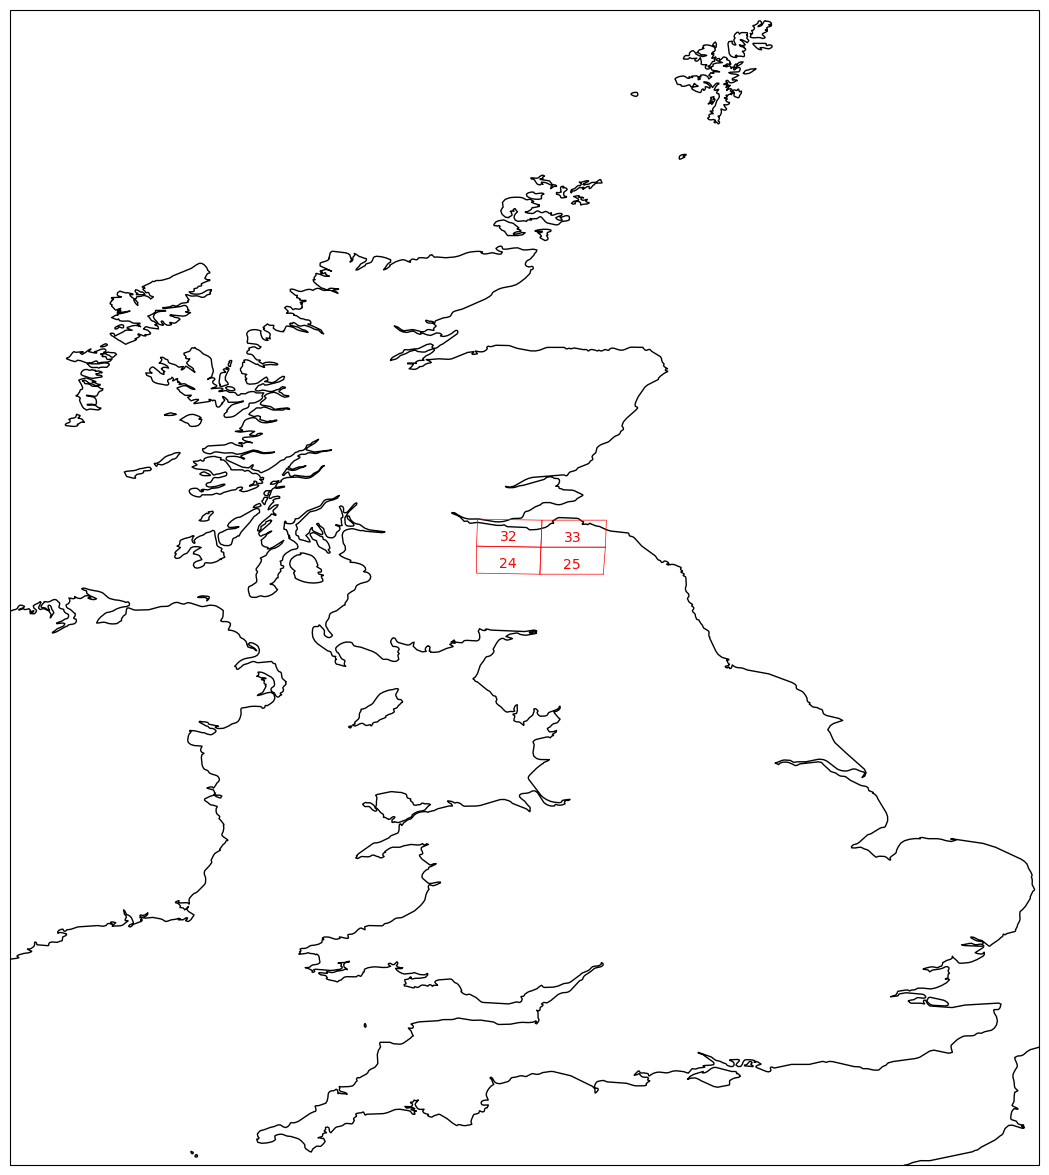

In [9]:
my_ts.plot_queries_on_map(map_extent='uk')

### 2. Finding map sheets which contain a set of coordinates.

The ``.query_map_sheets_by_coordinates()`` and ``.download_map_sheets_by_coordinates()`` methods can be used find and download map sheets which contain a set of coordinates.

> **_NOTE:_** We use the ``append=True`` argument to ensure our new queries are appended to our existing list.

In [10]:
my_ts.query_map_sheets_by_coordinates((-4.5, 55.4), print=True, append=True)

Query results:
URL:     	https://maps.nls.uk/view/74488618
coordinates (bounds):  	(-3.59999994, 55.52000003, -2.97999993, 55.79000003)
--------------------
URL:     	https://maps.nls.uk/view/74488621
coordinates (bounds):  	(-2.98999993, 55.52000003, -2.35999993, 55.78000003)
--------------------
URL:     	https://maps.nls.uk/view/74488700
coordinates (bounds):  	(-3.59999993, 55.78000003, -2.96999993, 56.05000003)
--------------------
URL:     	https://maps.nls.uk/view/74488705
coordinates (bounds):  	(-2.97999993, 55.78000003, -2.34999993, 56.04000003)
--------------------
URL:     	https://maps.nls.uk/view/74488586
coordinates (bounds):  	(-4.81999994, 55.27000003, -4.20999994, 55.53000003)
--------------------


We've used the ``append=True`` argument and so, if you plot your found queries, you will see a new map sheet has been added to your queries list.

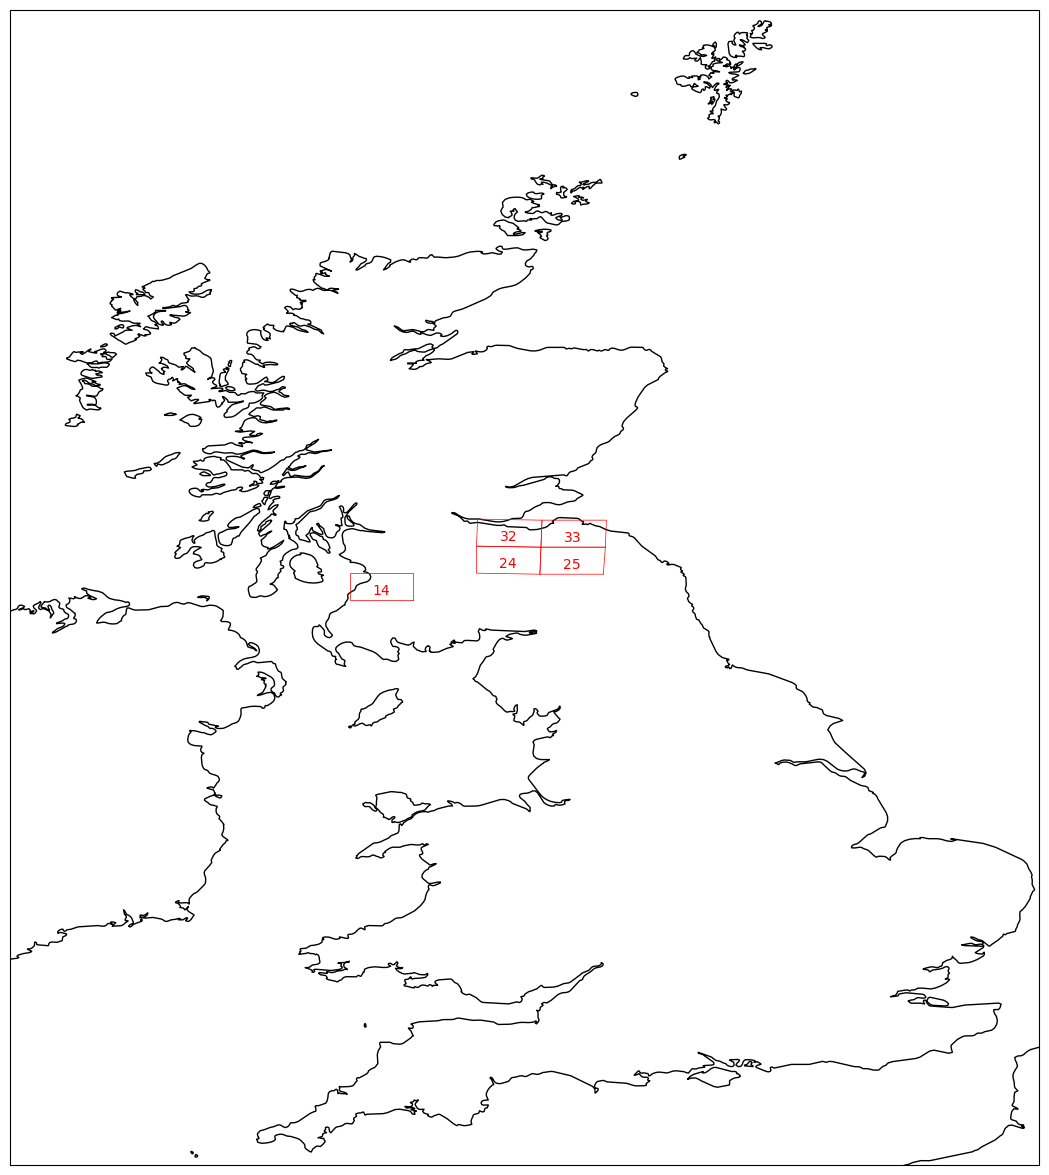

In [11]:
my_ts.plot_queries_on_map(map_extent='uk')

### 3. Finding map sheets which intersect with a line.

The ``.query_map_sheets_by_line()`` and ``.download_map_sheets_by_line()`` methods can be used find and download map sheets which intersect with a [shapely.LineString](https://shapely.readthedocs.io/en/stable/reference/shapely.LineString.html#shapely.LineString).

#### Create a line

In [12]:
from mapreader import create_line_from_latlons

In [13]:
my_line = create_line_from_latlons((56.5, -5), (57.0, -4.5))

#### Find maps

> **_NOTE:_** In the previous examples, we used the ``print=True`` argument to print our query results each time. We've now removed this so query results aren't being printed.

In [14]:
my_ts.query_map_sheets_by_line(my_line, append=True)

Again, after plotting your queries on a map, you'll see some new map sheets have been added to your queries list.

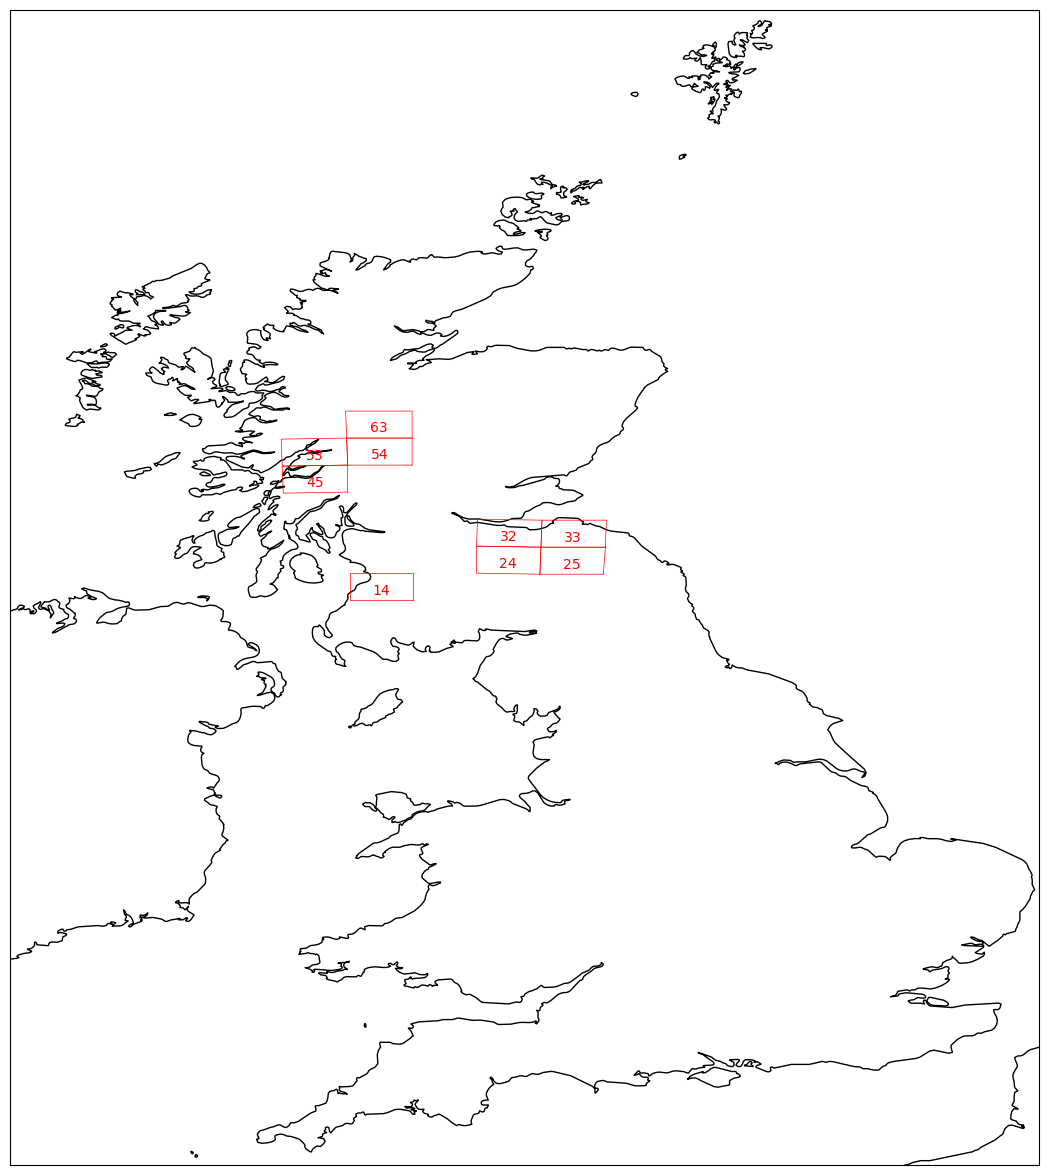

In [15]:
my_ts.plot_queries_on_map(map_extent='uk')

### 4. Finding map sheets using their WFS ID numbers.

The ``.query_map_sheets_by_wfs_ids()`` and ``.download_map_sheets_by_wfs_ids()`` methods can be used find and download map sheets using their WFS ID numbers.

These are the numbers in red that are being plotted on the maps in the cells above.

#### One map at a time

In [16]:
my_ts.query_map_sheets_by_wfs_ids(12, append=True)

#### Multiple maps at a time

In [17]:
my_ts.query_map_sheets_by_wfs_ids([30,37,38], append=True)

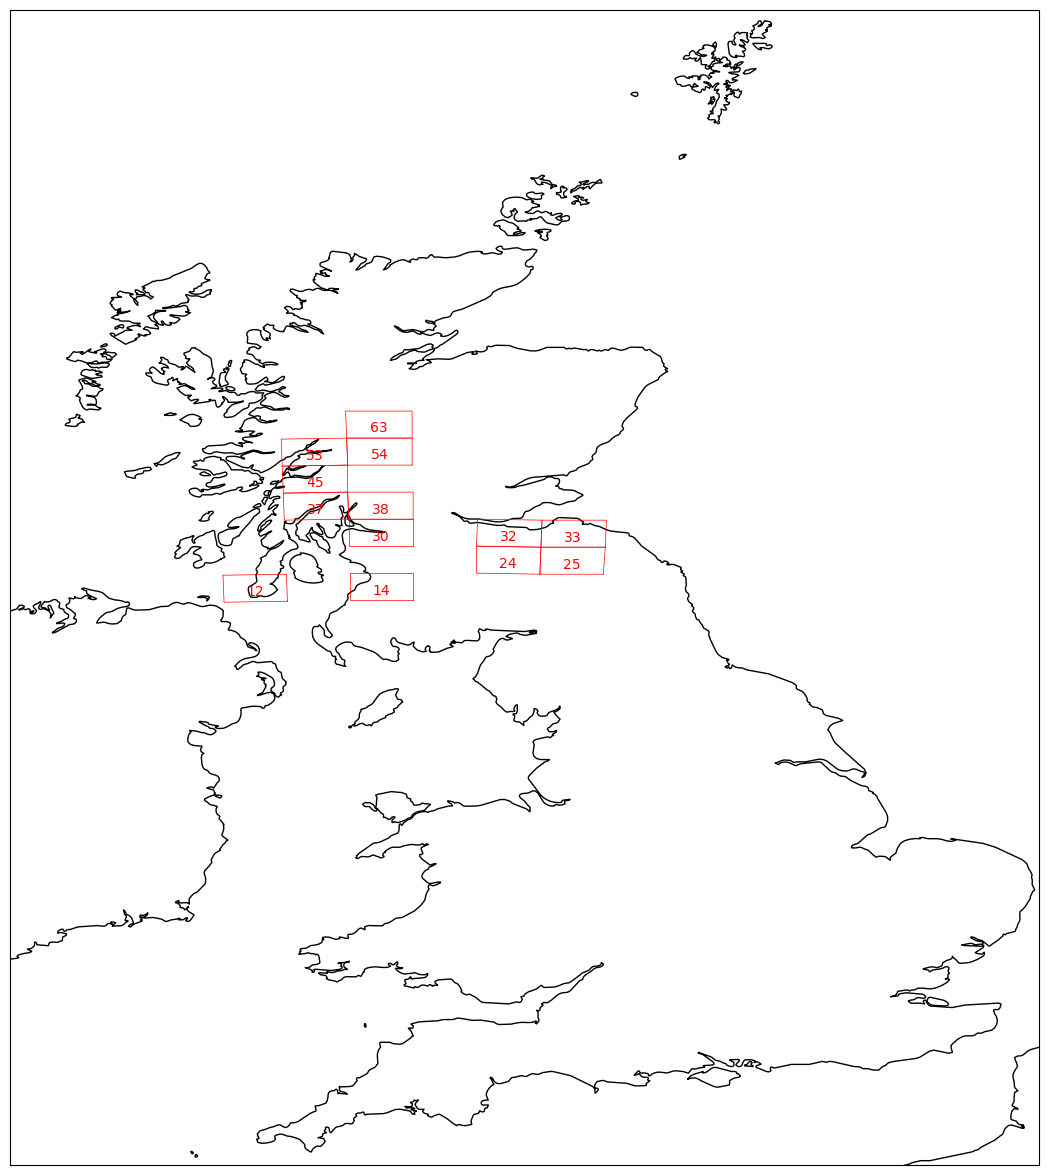

In [18]:
my_ts.plot_queries_on_map(map_extent='uk')

### 5. Finding map sheets by searching for a string in their metadata.

The ``.query_map_sheets_by_string()`` and ``.download_map_sheets_by_string()`` methods can be used find and download map sheets by searching for a string in their metadata.

These methods use [regex string searching](https://docs.python.org/3/library/re.html) to find map sheets whose metadata contains a given string. 
Wildcards and regular expressions can therefore be used in the ``string`` argument.

In [19]:
my_ts.query_map_sheets_by_string("Stirling", append=True)

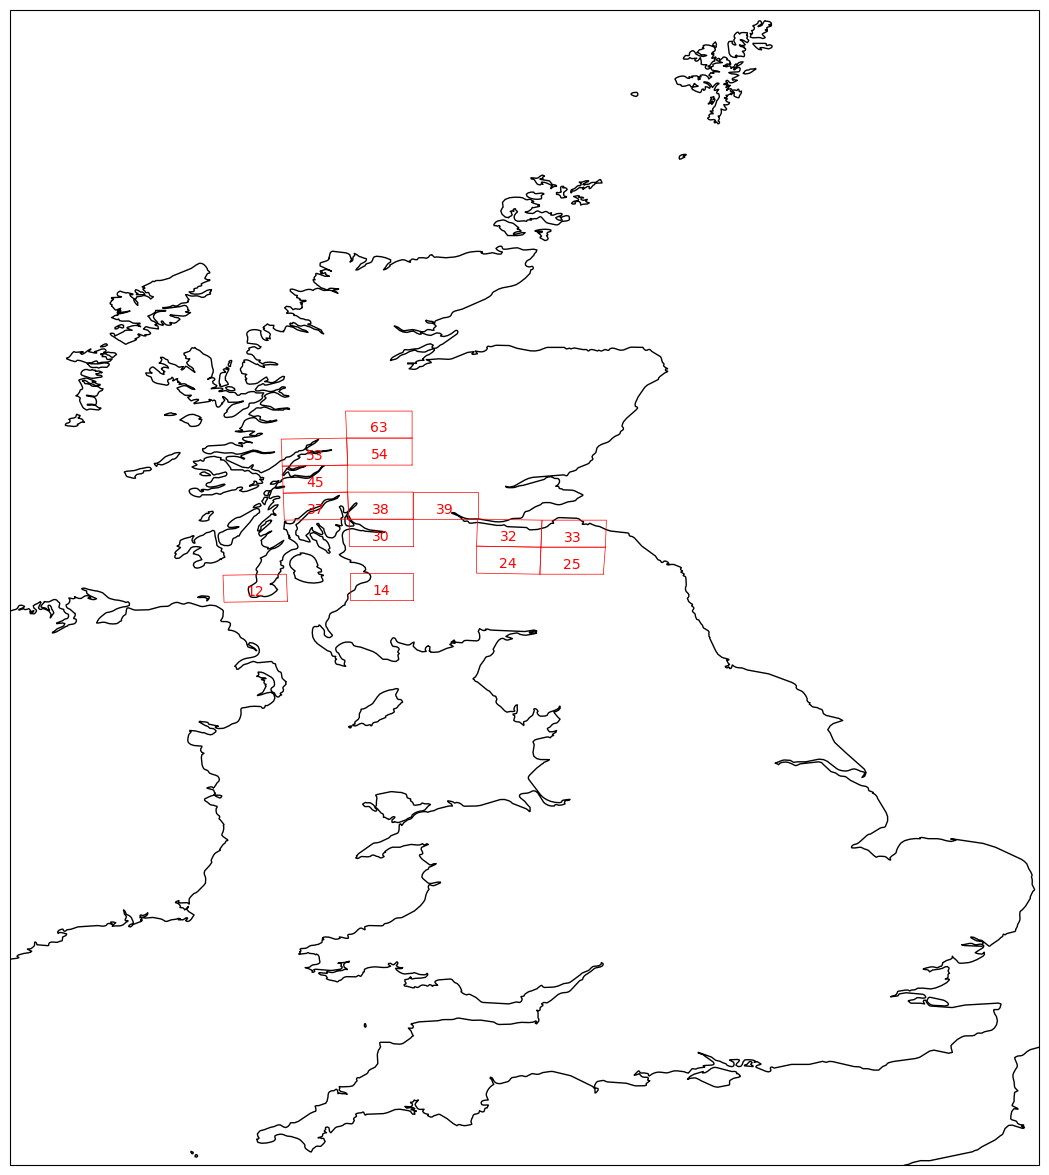

In [20]:
my_ts.plot_queries_on_map(map_extent="uk")

The above query command will search for "Stirling" in **all** metadata fields.

If instead, you'd like to search a particular metadata field (e.g. "IMAGEURL"), you can specify the ``keys`` argument.

> _**NOTE**_: You will need to have an idea of the structure of your metadata in order to do this. Use ``my_ts.features[0]`` to view the metadata for the first map sheet in our metadata, if you would like to see how our metadata is structured.

For the maps we are using in this workshop, it is possible to use the NLS Maps online collection to identify metadata strings to search for, like the words in the title or the unique ids that are present in the image URL. 

For example, if you navigate in a new browser window to https://maps.nls.uk/view/74487492, you can see one of the one-inch sheets. This can be selected by searching for "74487492" (the number at the end of the URL) in the "IMAGEURL" field.

To find other maps, you can use the index of digitised one-inch maps provided by the NLS [here](https://maps.nls.uk/os/one-inch-2nd/).

In [21]:
my_ts.query_map_sheets_by_string("74487492", keys=["properties","IMAGEURL"], append=True)

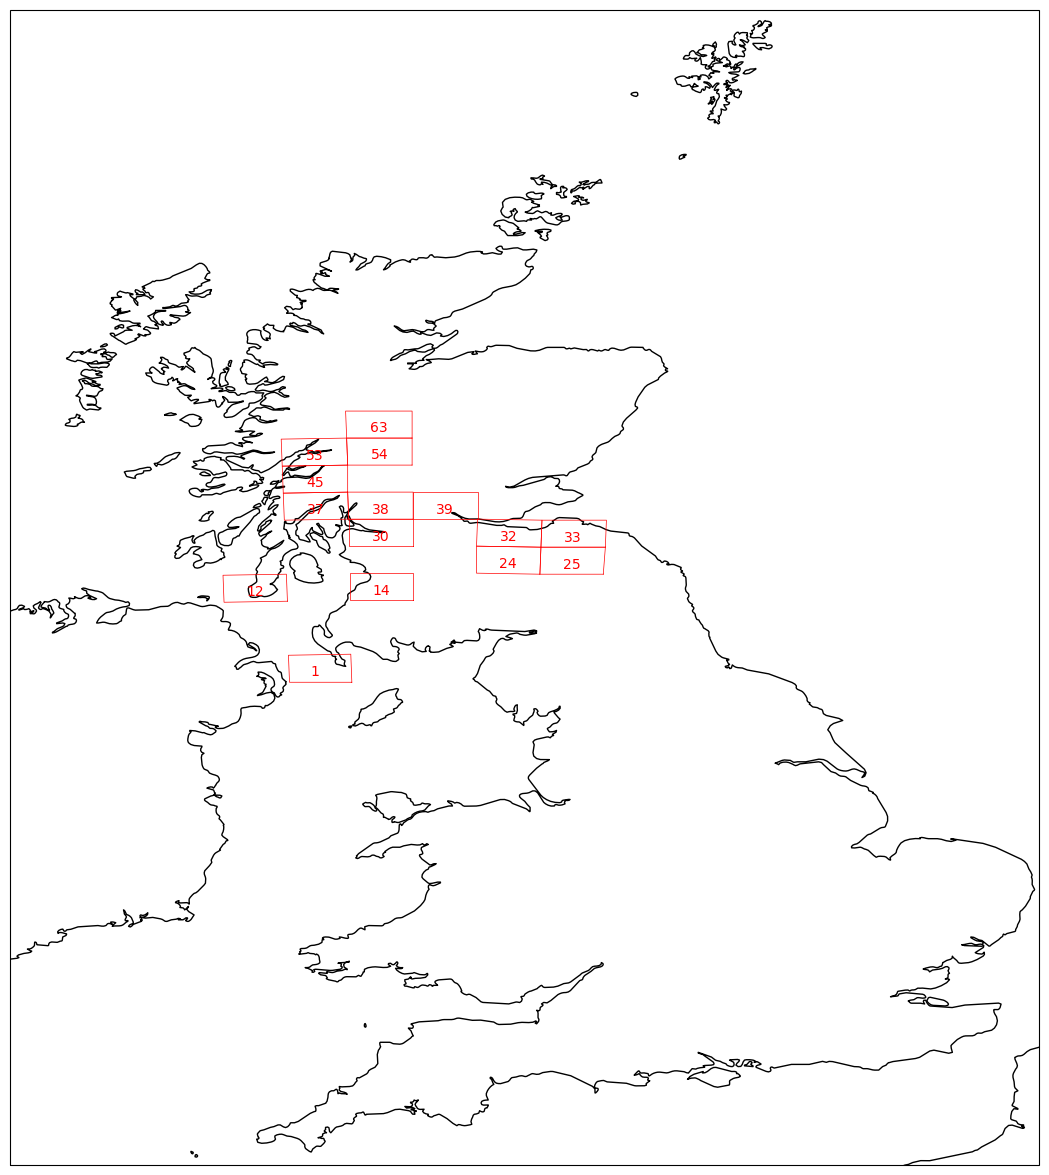

In [22]:
my_ts.plot_queries_on_map(map_extent="uk")

Another example, using regex could be: "19??" to find maps which have been published in the 1900's.
This could be searched in the field "WFS_TITLE" using ``keys=["properties","WFS_TITLE"]``

### Print found queries

You can print your queries list at any time using the ``.print_found_queries()`` method.

This means you can run multiple queries and check what you've found at the end.

In [23]:
my_ts.print_found_queries()

Query results:
URL:     	https://maps.nls.uk/view/74488618
coordinates (bounds):  	(-3.59999994, 55.52000003, -2.97999993, 55.79000003)
--------------------
URL:     	https://maps.nls.uk/view/74488621
coordinates (bounds):  	(-2.98999993, 55.52000003, -2.35999993, 55.78000003)
--------------------
URL:     	https://maps.nls.uk/view/74488700
coordinates (bounds):  	(-3.59999993, 55.78000003, -2.96999993, 56.05000003)
--------------------
URL:     	https://maps.nls.uk/view/74488705
coordinates (bounds):  	(-2.97999993, 55.78000003, -2.34999993, 56.04000003)
--------------------
URL:     	https://maps.nls.uk/view/74488586
coordinates (bounds):  	(-4.81999994, 55.27000003, -4.20999994, 55.53000003)
--------------------
URL:     	https://maps.nls.uk/view/74489053
coordinates (bounds):  	(-5.46999993, 56.30000003, -4.83999993, 56.57000003)
--------------------
URL:     	https://maps.nls.uk/view/74490356
coordinates (bounds):  	(-5.47999993, 56.56000003, -4.83999993, 56.83000003)
------------

## Download query results

To download the image files of the maps from the NLS tile server, you need to first set a zoom level using the ``.get_grid_bb()`` method.

In [24]:
my_ts.get_grid_bb(14)

Then, you can download your map sheets using ``.download_map_sheets_by_queries()``:

> _**NOTE**_: We have left ``path_save`` and ``metadata_fname`` as the default values, so maps will be saved in ``"./maps/"`` and their metadata will be saved as ``"./maps/metadata.csv"``.

> _**NOTE**_: Downloading maps will take some time depending on the number of sheets being downloaded!

In [25]:
my_ts.download_map_sheets_by_queries()

[INFO] "maps/map_74488618.png" already exists. Skipping download.
[INFO] "maps/map_74488621.png" already exists. Skipping download.
[INFO] "maps/map_74488700.png" already exists. Skipping download.
[INFO] "maps/map_74488705.png" already exists. Skipping download.
[INFO] "maps/map_74488586.png" already exists. Skipping download.
[INFO] "maps/map_74489053.png" already exists. Skipping download.
[INFO] "maps/map_74490356.png" already exists. Skipping download.
[INFO] "maps/map_74490359.png" already exists. Skipping download.
[INFO] "maps/map_74490389.png" already exists. Skipping download.
[INFO] "maps/map_74488580.png" already exists. Skipping download.
[INFO] "maps/map_74488689.png" already exists. Skipping download.
[INFO] "maps/map_74488722.png" already exists. Skipping download.
[INFO] "maps/map_74488742.png" already exists. Skipping download.
[INFO] "maps/map_74489035.png" already exists. Skipping download.
[INFO] "maps/map_74487492.png" already exists. Skipping download.


-----

# Load

MapReader’s ``Load`` subpackage is used to load, visualize and patchify images (e.g. maps) saved locally.

In this workshop, we will load the images that we have just downloaded from the NLS tile server.
These are saved in "maps/".

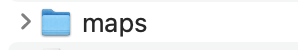

However, you could use any map images that you have saved locally. 
See the [Input Guidance](https://mapreader.readthedocs.io/en/latest/Input-guidance.html) section of the MapReader documentation for more details about file formats and metadata requirements.

## Import the ``loader`` and create your ``my_files`` object.

In [26]:
from mapreader import loader

In [27]:
my_files = loader("./maps/*png")

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:17<00:00,  1.18s/it]


### Add metadata

Add the ``metadata.csv`` file that was created when downloading your maps.

In [28]:
my_files.add_metadata("./maps/metadata.csv")

In [29]:
parent_df, patch_df = my_files.convert_images()
parent_df.head()

parent_id                                         image_path  \
image_id                                                                        
map_74489053.png      None  /Users/rwood/LwM/MapReader/worked_examples/geo...   
map_74487492.png      None  /Users/rwood/LwM/MapReader/worked_examples/geo...   
map_74488689.png      None  /Users/rwood/LwM/MapReader/worked_examples/geo...   
map_74490359.png      None  /Users/rwood/LwM/MapReader/worked_examples/geo...   
map_74488700.png      None  /Users/rwood/LwM/MapReader/worked_examples/geo...   

                            shape              name  \
image_id                                              
map_74489053.png  (5888, 7424, 4)  map_74489053.png   
map_74487492.png  (5888, 7424, 4)  map_74487492.png   
map_74488689.png  (5632, 7424, 4)  map_74488689.png   
map_74490359.png  (5888, 7424, 4)  map_74490359.png   
map_74488700.png  (5888, 7424, 4)  map_74488700.png   

                                                url  \
image_id                                              
map_74489053.png  https://maps.nls.uk/view/74489053   
map_74487492.png  https://maps.nls.uk/view/74487492   
map_74488689.png  https://maps.nls.uk/view/74488689   
map_74490359.png  https://maps.nls.uk/view/74490359   
map_74488700.png  https://maps.nls.uk/view/74488700   

                                                        coordinates  \
image_id                                                              
map_74489053.png  (-5.47119140625, 56.30434864830832, -4.8559570...   
map_74487492.png  (-5.42724609375, 54.48280455958255, -4.8120117...   
map_74488689.png  (-4.833984375, 55.80128097118045, -4.21875, 56...   
map_74490359.png  (-4.85595703125, 56.57158903959722, -4.2407226...   
map_74488700.png  (-3.603515625, 55.78892895389263, -2.98828125,...   

                        crs  published_date  \
image_id                                      
map_74489053.png  EPSG:4326            1897   
map_74487492.png  EPSG:4326            1896   
map_74488689.png  EPSG:4326            1898   
map_74490359.png  EPSG:4326            1896   
map_74488700.png  EPSG:4326            1898   

                                              grid_bb  
image_id                                               
map_74489053.png  [(14, 7943, 5055)x(14, 7971, 5077)]  
map_74487492.png  [(14, 7945, 5201)x(14, 7973, 5223)]  
map_74488689.png  [(14, 7972, 5097)x(14, 8000, 5118)]  
map_74490359.png  [(14, 7971, 5033)x(14, 7999, 5055)]  
map_74488700.png  [(14, 8028, 5097)x(14, 8056, 5119)]

## Patchify

The ``.patchify_all()`` method is used to slice your map images into patches. 

The method used to patchify your maps is selected by specifying ``method="pixel"`` or ``method="meters"``. This determines whether your ``patch_size`` is interpreted with units of ``pixel`` or ``meters``. 

#### Patchify by pixel

In [30]:
my_files.patchify_all(method="pixel", patch_size=200)

[INFO] Saving patches in directory named "patches_200_pixel".


100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:28<00:00,  1.87s/it]


#### Patchify by meters

You will only be able to use ``method="meters"`` if you have coordinates saved for each of your map images. 
These coordinates should correspond to the "bounding box" of your map image (minimum x, minimum y, maximum x and maximum y) and thereby associate the left, bottom, right and top edges of your map image to their geostatial locations.

These can be added by running either ``.add_metadata()`` (assuming your metadata contains these coordinates) or, if your images contain georefencing information, ``.add_geo_info()``.

> _**NOTE**_: We have used ``add_to_parents=False`` here so that these patches are not added to the ``my_files`` object. This is simply so that we don't have two sets of patches added after running both ``.patchify_all()`` commands.

In [31]:
my_files.patchify_all(method="meters", patch_size=5000, add_to_parents=False)

[INFO] Saving patches in directory named "patches_5000_meters".


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:00<00:00, 880.80it/s]


You will see your patches are saved in separate directories, each indicating the patch size and method used.

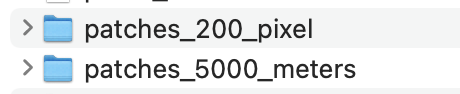

### Visualize patches

``MapReader`` also contains some useful functions for visualizing your patches.

For example, the ``.show_sample()`` method can be used to show a random sample of your patches:

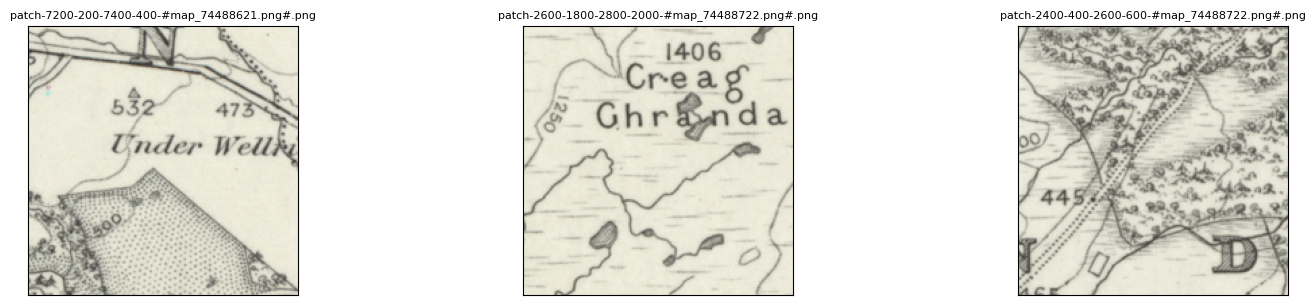

In [32]:
my_files.show_sample(num_samples=3, tree_level="patch")

You may also want to see all the patches created from one of your parent images. 
This can be done using the ``.show_parent()`` method:

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.67s/it]


[<Figure size 1000x1000 with 1 Axes>]

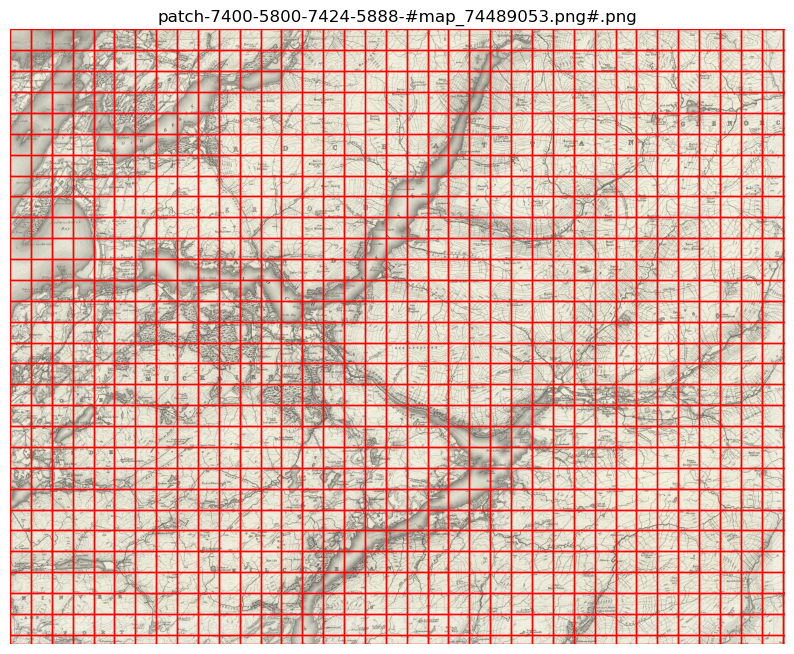

In [33]:
my_files.show_parent("map_74489053.png")

The ``.calc_pixel_stats()`` method can be used to calculate statistics on the pixel intensities of each patch.

This can be useful when annotating patches, as patches with higher pixel intensities contain more colour (i.e. are more likely to contain features as opposed to be blank space).

In [34]:
my_files.calc_pixel_stats()

100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:29<00:00,  1.96s/it]


By running the ``.convert_images()`` method, you will see that the means and standard deviations of pixel intensities of each patch have been added to your ``my_files`` object.

In [35]:
parent_df, patch_df = my_files.convert_images()
patch_df.head()

parent_id  \
image_id                                                        
patch-0-0-200-200-#map_74489053.png#.png     map_74489053.png   
patch-0-200-200-400-#map_74489053.png#.png   map_74489053.png   
patch-0-400-200-600-#map_74489053.png#.png   map_74489053.png   
patch-0-600-200-800-#map_74489053.png#.png   map_74489053.png   
patch-0-800-200-1000-#map_74489053.png#.png  map_74489053.png   

                                                                                    image_path  \
image_id                                                                                         
patch-0-0-200-200-#map_74489053.png#.png     /Users/rwood/LwM/MapReader/worked_examples/geo...   
patch-0-200-200-400-#map_74489053.png#.png   /Users/rwood/LwM/MapReader/worked_examples/geo...   
patch-0-400-200-600-#map_74489053.png#.png   /Users/rwood/LwM/MapReader/worked_examples/geo...   
patch-0-600-200-800-#map_74489053.png#.png   /Users/rwood/LwM/MapReader/worked_examples/geo...   
patch-0-800-200-1000-#map_74489053.png#.png  /Users/rwood/LwM/MapReader/worked_examples/geo...   

                                                     shape  \
image_id                                                     
patch-0-0-200-200-#map_74489053.png#.png     (200, 200, 4)   
patch-0-200-200-400-#map_74489053.png#.png   (200, 200, 4)   
patch-0-400-200-600-#map_74489053.png#.png   (200, 200, 4)   
patch-0-600-200-800-#map_74489053.png#.png   (200, 200, 4)   
patch-0-800-200-1000-#map_74489053.png#.png  (200, 200, 4)   

                                                    pixel_bounds  \
image_id                                                           
patch-0-0-200-200-#map_74489053.png#.png        (0, 0, 200, 200)   
patch-0-200-200-400-#map_74489053.png#.png    (0, 200, 200, 400)   
patch-0-400-200-600-#map_74489053.png#.png    (0, 400, 200, 600)   
patch-0-600-200-800-#map_74489053.png#.png    (0, 600, 200, 800)   
patch-0-800-200-1000-#map_74489053.png#.png  (0, 800, 200, 1000)   

                                                                                   coordinates  \
image_id                                                                                         
patch-0-0-200-200-#map_74489053.png#.png     (-5.47119140625, 56.30434864830832, -5.4546172...   
patch-0-200-200-400-#map_74489053.png#.png   (-5.47119140625, 56.31342610725156, -5.4546172...   
patch-0-400-200-600-#map_74489053.png#.png   (-5.47119140625, 56.3225035661948, -5.45461720...   
patch-0-600-200-800-#map_74489053.png#.png   (-5.47119140625, 56.33158102513803, -5.4546172...   
patch-0-800-200-1000-#map_74489053.png#.png  (-5.47119140625, 56.34065848408127, -5.4546172...   

                                                   crs  \
image_id                                                 
patch-0-0-200-200-#map_74489053.png#.png     EPSG:4326   
patch-0-200-200-400-#map_74489053.png#.png   EPSG:4326   
patch-0-400-200-600-#map_74489053.png#.png   EPSG:4326   
patch-0-600-200-800-#map_74489053.png#.png   EPSG:4326   
patch-0-800-200-1000-#map_74489053.png#.png  EPSG:4326   

                                                                                       polygon  \
image_id                                                                                         
patch-0-0-200-200-#map_74489053.png#.png     POLYGON ((-5.454617204337285 56.30434864830832...   
patch-0-200-200-400-#map_74489053.png#.png   POLYGON ((-5.454617204337285 56.31342610725156...   
patch-0-400-200-600-#map_74489053.png#.png   POLYGON ((-5.454617204337285 56.3225035661948,...   
patch-0-600-200-800-#map_74489053.png#.png   POLYGON ((-5.454617204337285 56.33158102513803...   
patch-0-800-200-1000-#map_74489053.png#.png  POLYGON ((-5.454617204337285 56.34065848408127...   

                                             mean_pixel_R  mean_pixel_G  \
image_id                                                                  
patch-0-0-200-200-#map_74489053.png#.png         0.776743      0.7

To save these outputs, use the ``save=True`` argument.

> _**NOTE**_: By default, this will save your outputs as ``.csv`` files. If instead, you'd like to save as ``.xslx`` files, add ``save_format="excel"`` to your command.

In [36]:
parent_df, patch_df = my_files.convert_images(save=True, save_format="excel")

[INFO] Saved parent dataframe as "parent_df.xlsx"
[INFO] Saved patch dataframe as "patch_df.xslx"


The ``.show_parent()`` method can also be used to view these pixel stats:

> _**NOTE**_: We use the ``alpha`` argument to set the transparency of our output to 0.5. This means we can see some of the parent image behind our plotted values.

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.76s/it]


[<Figure size 1000x1000 with 2 Axes>]

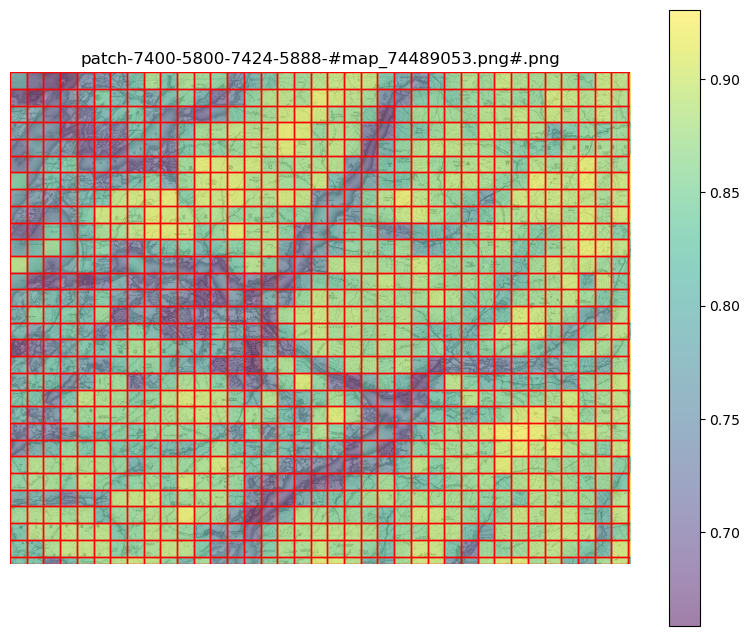

In [37]:
my_files.show_parent("map_74489053.png", column_to_plot="mean_pixel_R", alpha=0.5)

-----

# Annotate

Mapreader's ``Annotate`` subpackage is used to annotate images/patches. 

## Create an annotation tasks file

The first step of annotating your patches is to decide the visual features you would like to annotate and define labels for these.
This is done using a separate file (``annotation_tasks.yaml``) which contains all the information needed to carry out an annotation task.

> _**NOTE**_: This file has already been created and saved in the repo, so you don't need to worry about making it. However, if you do want to create your own, copy and edit the template in the "worked_examples" directory.

Your ``annotation_tasks.yaml`` file should have the following structure:

```yaml 
tasks:
  your_task_name:
    labels: ["your_label_1", "your_label_2", "your_label_3"]

paths:
  your_annotation_set:
        patch_paths: "./path/to/patches/*png"
        parent_paths: "./path/to/parents/*png"
        annot_dir: "./path/to/save/annotations"
```

We will be annotating buildings in our 200 pixel patches. 

Our ``annotation_tasks.yaml`` file will therefore look like:

```yaml
tasks:
  buildings:
    labels: ["no_building", "building"]

paths:
  set_001:
        patch_paths: "./patches_200_pixel/*png"
        parent_paths: "./maps/*png"
        annot_dir: "./annotations"
```

## Annotate your images

Before you begin annotating your images, you must tell MapReader:

- who is doing the annotations (``userID``),
- where to find your ``annotation_tasks.yaml`` (``annotation_tasks_file``),
- which task you’d like to run (``task``),
- which annotation_set you would like to run on (``annotation_set``).

We will also use the ``sort_by="mean"`` option, so that the patches with the highest pixel intensities are shown first.

In [38]:
from mapreader.annotate.utils import prepare_annotation

In [39]:
userID = "workshop" # using "workshop" as your user ID will load previous annotations
annotation_tasks_file = "annotation_tasks.yaml"
task = "buildings"
annotation_set = "set_001"

In [42]:
annotation = prepare_annotation(
    userID,
    annotation_tasks_file=annotation_tasks_file,
    task=task,
    annotation_set=annotation_set,
)

0it [00:00, ?it/s]
100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████| 15/15 [00:28<00:00,  1.88s/it]

Number of already annotated images: 632
Number of images to be annotated (total): 16417
Number of images to annotate (current batch): 100


In [73]:
annotation

Annotation(canvas=OutputCanvas(), progress=Progress(atoms=[<ipyannotate.progress.Atom object at 0x3087e19d0>, …

## Save your annotations

Once you've finished annotating, you will then need to save your annotations using the ``save_annotation`` function.

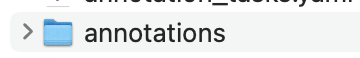

This will save your annotations as a ``.csv`` file, called ``buildings_#name#.csv`` which will look something like:

|  | image_id | image_path | label |
|- | -- | -- | -- |
|**0** | patch-1994-1994-2991-2991-#map_74490356.png#.png | /Users/rwood/LwM/MapReader/worked_examples/geo... | 2 |
|**1** | patch-6622-5676-7424-5888-#map_74487492.png#.png | /Users/rwood/LwM/MapReader/worked_examples/geo... | 1 |
|**2** | patch-3960-3960-4950-4950-#map_74489053.png#.png | /Users/rwood/LwM/MapReader/worked_examples/geo... | 2 |
|**3** | patch-3988-0-4985-997-#map_74490356.png#.png | /Users/rwood/LwM/MapReader/worked_examples/geo... | 1 |

In [43]:
from mapreader.annotate.utils import save_annotation

In [44]:
save_annotation(
    annotation,
    userID,
    annotation_tasks_file=annotation_tasks_file,
    task=task,
    annotation_set=annotation_set,
)

[INFO] Save 0 new annotations to ./annotations/buildings_#workshop#.csv
[INFO] 0 labels were not already stored
[INFO] Total number of saved annotations: 632


----

# Classify

Mapreader's ``Classify`` subpackage is used to 1) train or fine-tune a CV (computer vision) model to recognise visual features based on your annotated patches and 2) use your model to predict the labels of patches across entire datasets.

It contains two important classes:

- ``AnnotationsLoader`` - This is used to load and review your annotations and to create datasets and dataloaders which are used to train your model.
- ``ClassifierContainer`` - This is used to set up your model, train/fine-tune it using your datasets and to infer labels on new datasets.

## Load annotations

In [45]:
from mapreader import AnnotationsLoader

In [46]:
annotated_images = AnnotationsLoader()
annotated_images.load(annotations = "./annotations/buildings_#workshop#.csv")

[INFO] Reading "./annotations/buildings_#workshop#.csv"
[INFO] Number of annotations:   632

[INFO] Number of instances of each label (from column "label"):
        - 1:      412
        - 2:      220



### Review labels

Before training your model, you should check your annotations and ensure you are happy with your labels.

This can be done using the ``.review_labels()`` method.

For example, to re-label image with ``id: 5``, type "5" into the text box, press enter, then type the label (number) you'd like to re-label it as and press enter again.

[INFO] Type "exit", "end" or "stop" to exit.
[INFO] Showing 0-24 out of 132.


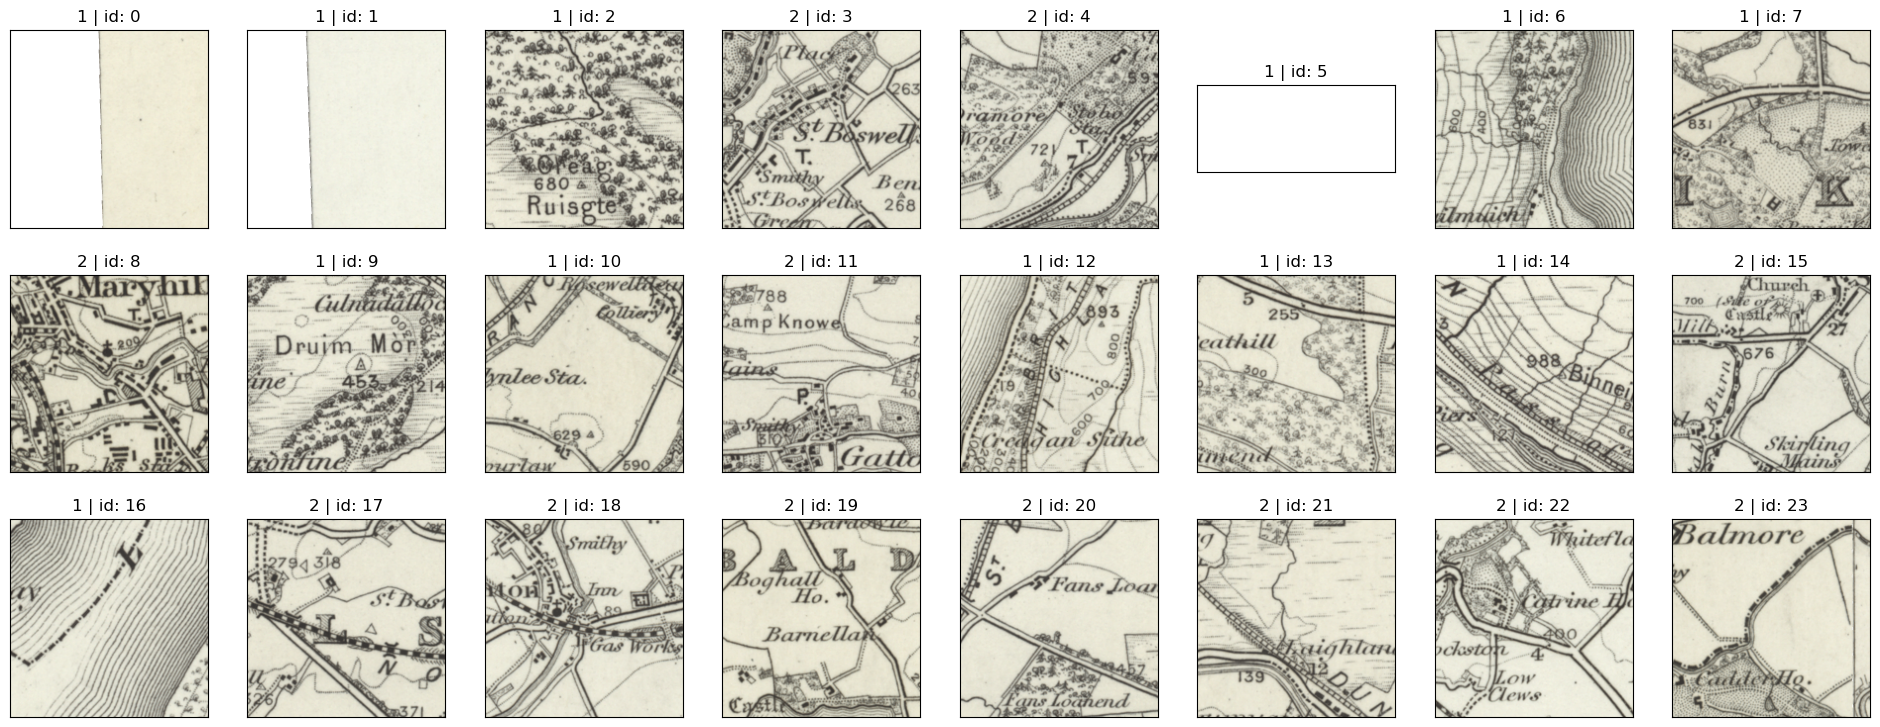

[INFO] IDs of current patches: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]

Enter IDs, comma separated (or press enter to continue): exit
[INFO] Exited.


In [47]:
annotated_images.review_labels()

### Create datasets and dataloaders

Before using your annotated images to train your model, you will first need to:

1. Split your annotated images into “train”, “val” and and, optionally, “test” datasets.
2. Define some transforms which will be applied to your images to ensure your they are in the right format.
3. Create dataloaders which can be used to load small batches of your dataset during training/inference and apply the transforms to each image in the batch.

> __**NOTE**__: Go to the [Classify](https://mapreader.readthedocs.io/en/latest/User-guide/Classify.html#prepare-datasets-and-dataloaders) section of the user-guide for more information.

The ``.create_dataloaders()`` method carries out these three steps. 

> __**NOTE**__: The default train/val/test split, image transforms and sampler will be used if no arguments are supplied to the ``.create_dataloader()`` method. 

In [47]:
dataloaders = annotated_images.create_dataloaders()

[INFO] Creating datasets using default train/val/test split of 0.7:0.15:0.15 and default transformations.
[INFO] Number of annotations in each set:
        - Train:        442
        - Validate:     95
        - Test:         95
[INFO] Using default sampler.


The code below can be used to see the number of instances of each labelled image in each dataset. 

This shows the importance of having enough annotations so that each dataset contains a good sample of patches for training, validating and testing your model.

In [48]:
for set_name, dataset in annotated_images.datasets.items():
    print(f'Number of instances of each label in "{set_name}":')
    value_counts = dataset.patch_df["label"].value_counts()
    print(f'no_rail_space:\t{value_counts[0]}')
    print(f'rail_space:\t{value_counts[1]}\n')

Number of instances of each label in "train":
no_rail_space:	288
rail_space:	154

Number of instances of each label in "val":
no_rail_space:	62
rail_space:	33

Number of instances of each label in "test":
no_rail_space:	62
rail_space:	33



## Train your model

### Set up your ``my_classifier`` object

In [49]:
from mapreader import ClassifierContainer

In [50]:
my_classifier = ClassifierContainer("resnet18", dataloaders, labels_map={0:"no_building",1:"building"})

[INFO] Device is set to cpu
[INFO] Loaded "train" with 442 items.
[INFO] Loaded "val" with 95 items.
[INFO] Loaded "test" with 95 items.
[INFO] Initializing model.


In [51]:
my_classifier.add_criterion("cross-entropy")

[INFO] Using "CrossEntropyLoss()" as criterion.


In [52]:
params2optimise = my_classifier.generate_layerwise_lrs(min_lr=1e-4, max_lr=1e-3)
my_classifier.initialize_optimizer(params2optimise=params2optimise)

In [53]:
my_classifier.initialize_scheduler()

### Train your model using your "train" and "val" datasets

In [54]:
my_classifier.train(num_epochs=10)

[INFO] Each training step will pass: ['train', 'val'].
2023-06-06 13:51:54 599-JY5FK6 [INFO] train    -- 1/10 --     16/442 (  3.6% ) -- Loss: 1.086
2023-06-06 13:51:59 599-JY5FK6 [INFO] train    -- 1/10 --     96/442 ( 21.7% ) -- Loss: 1.004
2023-06-06 13:52:05 599-JY5FK6 [INFO] train    -- 1/10 --    176/442 ( 39.8% ) -- Loss: 0.093
2023-06-06 13:52:10 599-JY5FK6 [INFO] train    -- 1/10 --    256/442 ( 57.9% ) -- Loss: 0.111
2023-06-06 13:52:15 599-JY5FK6 [INFO] train    -- 1/10 --    336/442 ( 76.0% ) -- Loss: 0.271
2023-06-06 13:52:21 599-JY5FK6 [INFO] train    -- 1/10 --    416/442 ( 94.1% ) -- Loss: 0.289
2023-06-06 13:52:22 599-JY5FK6 [INFO] train    -- 1/10 -- Loss: 0.436; F_macro: 71.99; R_macro: 73.55
2023-06-06 13:52:23 599-JY5FK6 [INFO] val      -- 1/10 --      16/95 ( 16.8% ) -- Loss: 0.143
2023-06-06 13:52:26 599-JY5FK6 [INFO] val      -- 1/10 --      95/95 (100.0% ) -- Loss: 0.551
2023-06-06 13:52:26 599-JY5FK6 [INFO] val      -- 1/10 -- Loss: 0.611; F_macro: 84.51; R_ma

2023-06-06 13:55:15 599-JY5FK6 [INFO] val      -- 6/10 --      95/95 (100.0% ) -- Loss: 0.308
2023-06-06 13:55:15 599-JY5FK6 [INFO] val      -- 6/10 -- Loss: 0.413; F_macro: 78.82; R_macro: 76.47

[INFO] Checkpoint file saved to "./tmp_checkpoints/tmp_3628011902_checkpoint.pkl".
2023-06-06 13:55:16 599-JY5FK6 [INFO] train    -- 7/10 --     16/442 (  3.6% ) -- Loss: 0.097
2023-06-06 13:55:22 599-JY5FK6 [INFO] train    -- 7/10 --     96/442 ( 21.7% ) -- Loss: 0.104
2023-06-06 13:55:27 599-JY5FK6 [INFO] train    -- 7/10 --    176/442 ( 39.8% ) -- Loss: 0.323
2023-06-06 13:55:33 599-JY5FK6 [INFO] train    -- 7/10 --    256/442 ( 57.9% ) -- Loss: 0.062
2023-06-06 13:55:38 599-JY5FK6 [INFO] train    -- 7/10 --    336/442 ( 76.0% ) -- Loss: 0.756
2023-06-06 13:55:44 599-JY5FK6 [INFO] train    -- 7/10 --    416/442 ( 94.1% ) -- Loss: 0.095
2023-06-06 13:55:45 599-JY5FK6 [INFO] train    -- 7/10 -- Loss: 0.228; F_macro: 86.77; R_macro: 85.57
2023-06-06 13:55:46 599-JY5FK6 [INFO] val      -- 7/10

The best version of your model will be saved in the "models" directory.

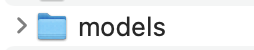

### Visualize results

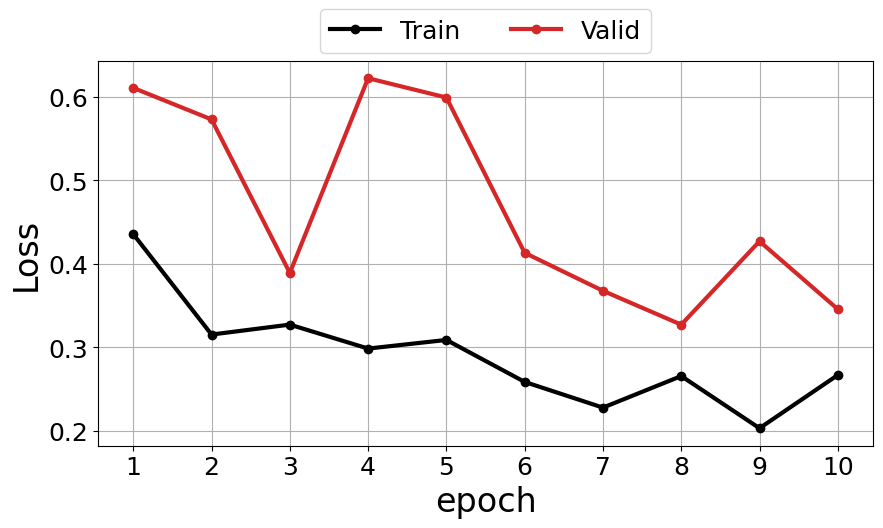

In [55]:
my_classifier.plot_metric(
    y_axis=["epoch_loss_train", "epoch_loss_val"],
    y_label="Loss",
    legends=["Train", "Valid"],
)

### Test

The "test" dataset can be used to test out your model on previously unseen images. 

As these are already annotated, it makes it easy to understand whether the model is performing as expected.

In [56]:
my_classifier.inference(set_name="test")

[INFO] Each training step will pass: ['test'].
2023-06-06 13:57:32 599-JY5FK6 [INFO] test     -- 11/11 --      16/95 ( 16.8% ) -- 
2023-06-06 13:57:35 599-JY5FK6 [INFO] test     -- 11/11 --      95/95 (100.0% ) -- 
[INFO] Total time: 0m 3s


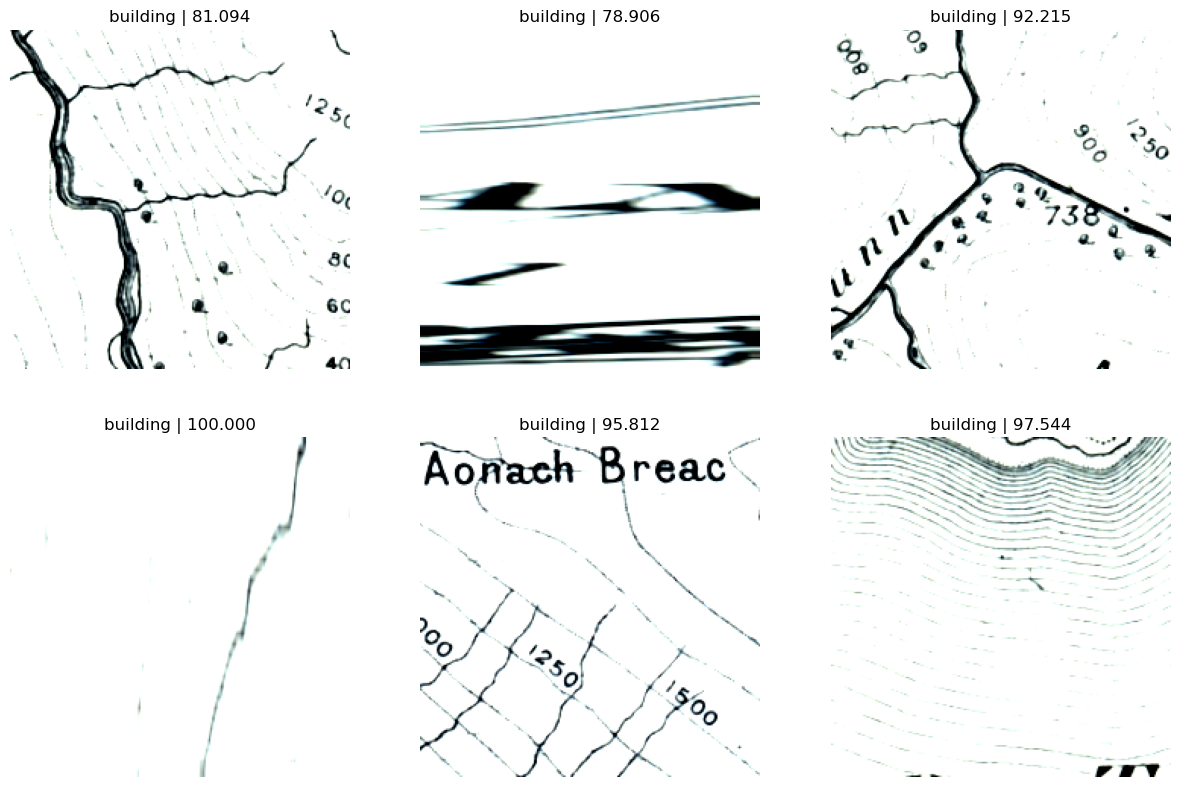

In [57]:
my_classifier.show_inference_sample_results(label="building", min_conf=0.8)

# Infer 

The fine-tuned model can now be used to infer, or predict, the labels of "unseen" patches.

To show how inference works, we will predict the labels on patches from just one parent image. 

We will do this by creating a ``subset_patch_df`` from our previously saved ``patch_df.xlsx``.
Our new ``subset_patch_df`` will only contain the information of patches from ``map_74488700.png``.

In [59]:
import pandas as pd
patch_df = pd.read_excel("./patch_df.xlsx", index_col=0) #load our patch_df.xlsx file
subset_patch_df=patch_df[patch_df["parent_id"]=="map_74488700.png"] #filter for our chosen parent image
subset_patch_df.head()

parent_id  \
image_id                                                        
patch-0-0-200-200-#map_74488700.png#.png     map_74488700.png   
patch-0-200-200-400-#map_74488700.png#.png   map_74488700.png   
patch-0-400-200-600-#map_74488700.png#.png   map_74488700.png   
patch-0-600-200-800-#map_74488700.png#.png   map_74488700.png   
patch-0-800-200-1000-#map_74488700.png#.png  map_74488700.png   

                                                                                    image_path  \
image_id                                                                                         
patch-0-0-200-200-#map_74488700.png#.png     /Users/rwood/LwM/MapReader/worked_examples/geo...   
patch-0-200-200-400-#map_74488700.png#.png   /Users/rwood/LwM/MapReader/worked_examples/geo...   
patch-0-400-200-600-#map_74488700.png#.png   /Users/rwood/LwM/MapReader/worked_examples/geo...   
patch-0-600-200-800-#map_74488700.png#.png   /Users/rwood/LwM/MapReader/worked_examples/geo...   
patch-0-800-200-1000-#map_74488700.png#.png  /Users/rwood/LwM/MapReader/worked_examples/geo...   

                                                     shape  \
image_id                                                     
patch-0-0-200-200-#map_74488700.png#.png     (200, 200, 4)   
patch-0-200-200-400-#map_74488700.png#.png   (200, 200, 4)   
patch-0-400-200-600-#map_74488700.png#.png   (200, 200, 4)   
patch-0-600-200-800-#map_74488700.png#.png   (200, 200, 4)   
patch-0-800-200-1000-#map_74488700.png#.png  (200, 200, 4)   

                                                    pixel_bounds  \
image_id                                                           
patch-0-0-200-200-#map_74488700.png#.png        (0, 0, 200, 200)   
patch-0-200-200-400-#map_74488700.png#.png    (0, 200, 200, 400)   
patch-0-400-200-600-#map_74488700.png#.png    (0, 400, 200, 600)   
patch-0-600-200-800-#map_74488700.png#.png    (0, 600, 200, 800)   
patch-0-800-200-1000-#map_74488700.png#.png  (0, 800, 200, 1000)   

                                                                                   coordinates  \
image_id                                                                                         
patch-0-0-200-200-#map_74488700.png#.png     (-3.603515625, 55.78892895389263, -3.586941423...   
patch-0-200-200-400-#map_74488700.png#.png   (-3.603515625, 55.79812869999365, -3.586941423...   
patch-0-400-200-600-#map_74488700.png#.png   (-3.603515625, 55.807328446094665, -3.58694142...   
patch-0-600-200-800-#map_74488700.png#.png   (-3.603515625, 55.816528192195676, -3.58694142...   
patch-0-800-200-1000-#map_74488700.png#.png  (-3.603515625, 55.825727938296694, -3.58694142...   

                                                   crs  \
image_id                                                 
patch-0-0-200-200-#map_74488700.png#.png     EPSG:4326   
patch-0-200-200-400-#map_74488700.png#.png   EPSG:4326   
patch-0-400-200-600-#map_74488700.png#.png   EPSG:4326   
patch-0-600-200-800-#map_74488700.png#.png   EPSG:4326   
patch-0-800-200-1000-#map_74488700.png#.png  EPSG:4326   

                                                                                       polygon  \
image_id                                                                                         
patch-0-0-200-200-#map_74488700.png#.png     POLYGON ((-3.5869414230872847 55.7889289538926...   
patch-0-200-200-400-#map_74488700.png#.png   POLYGON ((-3.5869414230872847 55.7981286999936...   
patch-0-400-200-600-#map_74488700.png#.png   POLYGON ((-3.5869414230872847 55.8073284460946...   
patch-0-600-200-800-#map_74488700.png#.png   POLYGON ((-3.5869414230872847 55.8165281921956...   
patch-0-800-200-1000-#map_74488700.png#.png  POLYGON ((-3.5869414230872847 55.8257279382966...   

                                             mean_pixel_R  mean_pixel_G  \
image_id                                                                  
patch-0-0-200-200-#map_74488700.png#.png         0.823825      0.8

> __**NOTE**__: MapReader can be used to predict the labels on entire datasets and so creating a ``subset_patch_df`` is not needed in most use cases.

### Create a dataset (``infer``) from our ``subset_patch_df``

In [60]:
from mapreader import PatchDataset

In [61]:
infer = PatchDataset(subset_patch_df, transform ="val", patch_paths_col="image_path")

### Load dataset into ``my_classifier``

In [62]:
my_classifier.load_dataset(infer, "infer")

### Run model inference

In [63]:
my_classifier.inference("infer")

[INFO] Each training step will pass: ['infer'].
2023-06-06 13:59:51 599-JY5FK6 [INFO] infer    -- 11/11 --    16/1140 (  1.4% ) -- 
2023-06-06 13:59:54 599-JY5FK6 [INFO] infer    -- 11/11 --    96/1140 (  8.4% ) -- 
2023-06-06 13:59:57 599-JY5FK6 [INFO] infer    -- 11/11 --   176/1140 ( 15.4% ) -- 
2023-06-06 13:59:59 599-JY5FK6 [INFO] infer    -- 11/11 --   256/1140 ( 22.5% ) -- 
2023-06-06 14:00:02 599-JY5FK6 [INFO] infer    -- 11/11 --   336/1140 ( 29.5% ) -- 
2023-06-06 14:00:05 599-JY5FK6 [INFO] infer    -- 11/11 --   416/1140 ( 36.5% ) -- 
2023-06-06 14:00:08 599-JY5FK6 [INFO] infer    -- 11/11 --   496/1140 ( 43.5% ) -- 
2023-06-06 14:00:11 599-JY5FK6 [INFO] infer    -- 11/11 --   576/1140 ( 50.5% ) -- 
2023-06-06 14:00:14 599-JY5FK6 [INFO] infer    -- 11/11 --   656/1140 ( 57.5% ) -- 
2023-06-06 14:00:17 599-JY5FK6 [INFO] infer    -- 11/11 --   736/1140 ( 64.6% ) -- 
2023-06-06 14:00:20 599-JY5FK6 [INFO] infer    -- 11/11 --   816/1140 ( 71.6% ) -- 
2023-06-06 14:00:23 599-JY5F

### Visualize results

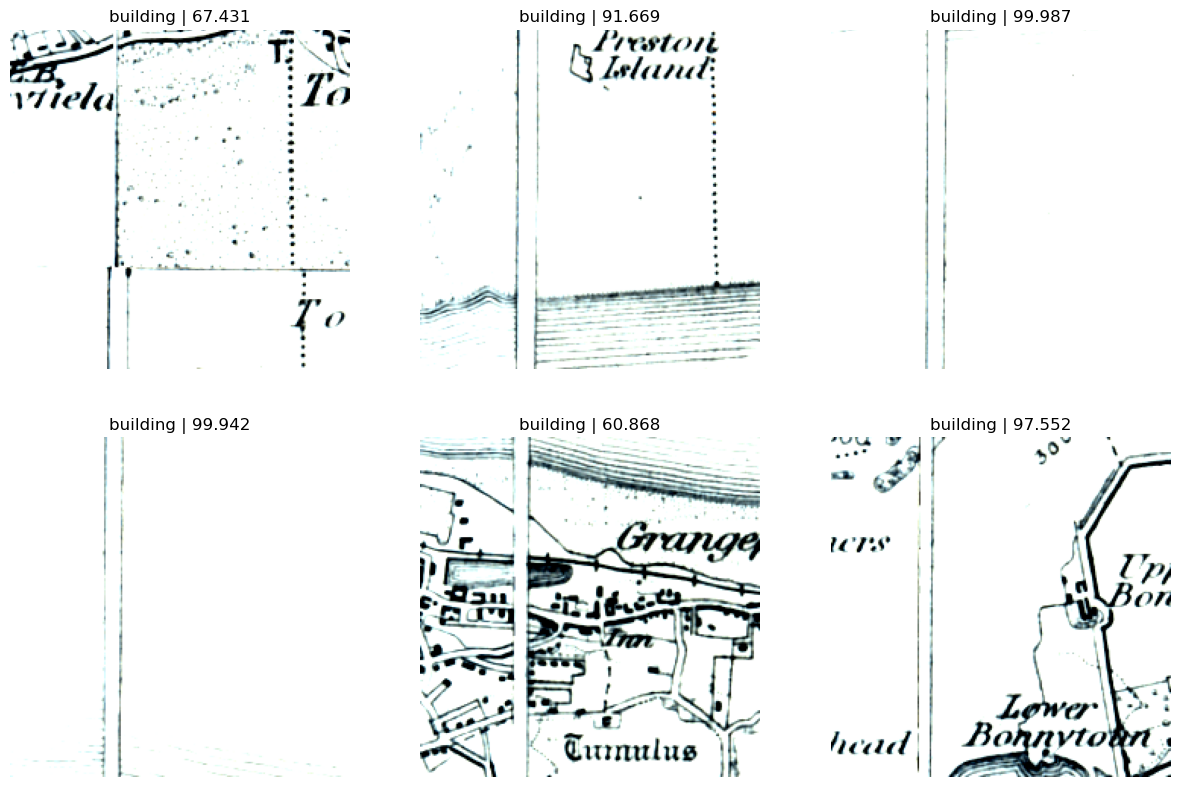

In [64]:
my_classifier.show_inference_sample_results("building", 6, set_name="infer")

### Save results to metadata

First, we need to add the predicted label, its indices and the confidence of the prediction to our ``infer`` dataset.

This is done by adding the values to an ``infer_df`` which we create from the the ``.patch_df`` attribute of our ``infer`` dataset.

In [65]:
infer_df = infer.patch_df.copy()

In [66]:
import numpy as np

infer_df['predicted_label'] = my_classifier.pred_label
infer_df['pred'] = my_classifier.pred_label_indices
infer_df['conf'] = np.array(my_classifier.pred_conf).max(axis=1)

infer_df.reset_index(names="name", inplace=True)
infer_df.head()

name         parent_id  \
0     patch-0-0-200-200-#map_74488700.png#.png  map_74488700.png   
1   patch-0-200-200-400-#map_74488700.png#.png  map_74488700.png   
2   patch-0-400-200-600-#map_74488700.png#.png  map_74488700.png   
3   patch-0-600-200-800-#map_74488700.png#.png  map_74488700.png   
4  patch-0-800-200-1000-#map_74488700.png#.png  map_74488700.png   

                                          image_path          shape  \
0  /Users/rwood/LwM/MapReader/worked_examples/geo...  (200, 200, 4)   
1  /Users/rwood/LwM/MapReader/worked_examples/geo...  (200, 200, 4)   
2  /Users/rwood/LwM/MapReader/worked_examples/geo...  (200, 200, 4)   
3  /Users/rwood/LwM/MapReader/worked_examples/geo...  (200, 200, 4)   
4  /Users/rwood/LwM/MapReader/worked_examples/geo...  (200, 200, 4)   

          pixel_bounds                                        coordinates  \
0     (0, 0, 200, 200)  (-3.603515625, 55.78892895389263, -3.586941423...   
1   (0, 200, 200, 400)  (-3.603515625, 55.79812869999365, -3.586941423...   
2   (0, 400, 200, 600)  (-3.603515625, 55.807328446094665, -3.58694142...   
3   (0, 600, 200, 800)  (-3.603515625, 55.816528192195676, -3.58694142...   
4  (0, 800, 200, 1000)  (-3.603515625, 55.825727938296694, -3.58694142...   

         crs                                            polygon  mean_pixel_R  \
0  EPSG:4326  POLYGON ((-3.5869414230872847 55.7889289538926...      0.823825   
1  EPSG:4326  POLYGON ((-3.5869414230872847 55.7981286999936...      0.817216   
2  EPSG:4326  POLYGON ((-3.5869414230872847 55.8073284460946...      0.890646   
3  EPSG:4326  POLYGON ((-3.5869414230872847 55.8165281921956...      0.885085   
4  EPSG:4326  POLYGON ((-3.5869414230872847 55.8257279382966...      0.724211   

   mean_pixel_G  mean_pixel_B  mean_pixel_A  std_pixel_R  std_pixel_G  \
0      0.813215      0.748347      0.998894     0.114696     0.115315   
1      0.806495      0.742094      0.999450     0.099157     0.099876   
2      0.877273      0.805296      0.999269     0.049854     0.050727   
3      0.872295      0.801478      0.999185     0.057350     0.057165   
4      0.714249      0.654585      0.999291     0.149873     0.150287   

   std_pixel_B  std_pixel_A predicted_label  pred      conf  
0     0.107755     0.019797        building     1  0.674310  
1     0.094300     0.015834        building     1  0.916686  
2     0.049773     0.017691        building     1  0.999873  
3     0.054614     0.018766        building     1  0.999419  
4     0.140324     0.017227        building     1  0.608684

We can then load our patches and add the metadata from our ``infer.patch_df``.

In [67]:
from mapreader import load_patches

In [68]:
my_maps = load_patches("./patches_200_pixel/*74488700*png", parent_paths="./maps/*74488700.png")

0it [00:00, ?it/s]
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 1140/1140 [00:00<00:00, 22332.32it/s]


In [69]:
my_maps.add_metadata(infer_df,ignore_mismatch=True, tree_level='patch')

In [70]:
my_maps.add_shape()

[INFO] Add shape, tree level: parent


We can use the ``.show_parent()`` method to see how our predictions look on our parent map sheet (``map_74488700.png``).

100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████| 1/1 [00:01<00:00,  1.42s/it]


[<Figure size 1000x1000 with 2 Axes>]

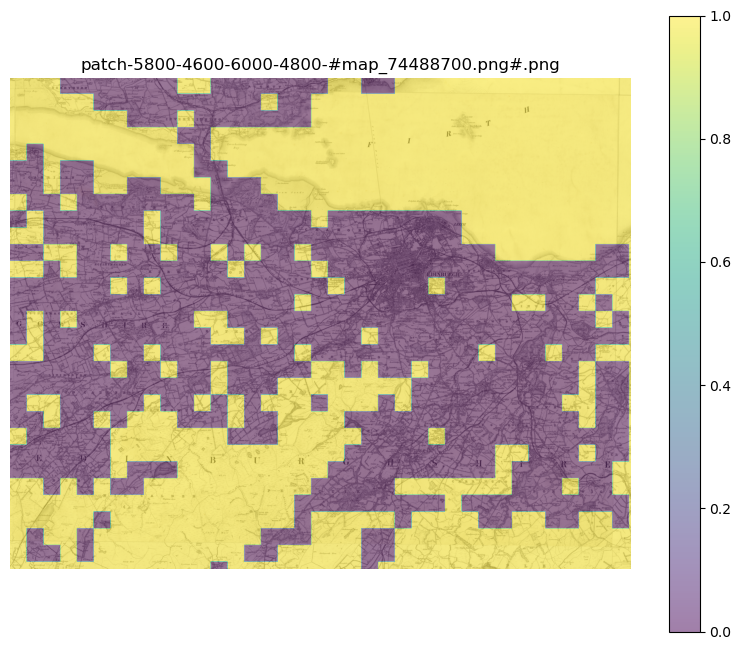

In [71]:
my_maps.show_parent("map_74488700.png", column_to_plot="pred", vmin=0, vmax=1, alpha=0.5, patch_border=False)

And the ``.convert_images()`` method to save our results.

In [80]:
parent_df, patch_df = my_maps.convert_images(save=True, save_format='csv')
patch_df.head()

[INFO] Saved parent dataframe as "parent_df.csv"
[INFO] Saved patch dataframe as "patch_df.csv"


parent_id  \
image_id                                                             
patch-6200-2200-6400-2400-#map_74488700.png#.png  map_74488700.png   
patch-1600-5800-1800-5888-#map_74488700.png#.png  map_74488700.png   
patch-3800-4200-4000-4400-#map_74488700.png#.png  map_74488700.png   
patch-3200-1400-3400-1600-#map_74488700.png#.png  map_74488700.png   
patch-400-1200-600-1400-#map_74488700.png#.png    map_74488700.png   

                                                                                         image_path  \
image_id                                                                                              
patch-6200-2200-6400-2400-#map_74488700.png#.png  /Users/rwood/LwM/MapReader/worked_examples/geo...   
patch-1600-5800-1800-5888-#map_74488700.png#.png  /Users/rwood/LwM/MapReader/worked_examples/geo...   
patch-3800-4200-4000-4400-#map_74488700.png#.png  /Users/rwood/LwM/MapReader/worked_examples/geo...   
patch-3200-1400-3400-1600-#map_74488700.png#.png  /Users/rwood/LwM/MapReader/worked_examples/geo...   
patch-400-1200-600-1400-#map_74488700.png#.png    /Users/rwood/LwM/MapReader/worked_examples/geo...   

                                                              pixel_bounds  \
image_id                                                                     
patch-6200-2200-6400-2400-#map_74488700.png#.png  (6200, 2200, 6400, 2400)   
patch-1600-5800-1800-5888-#map_74488700.png#.png  (1600, 5800, 1800, 5888)   
patch-3800-4200-4000-4400-#map_74488700.png#.png  (3800, 4200, 4000, 4400)   
patch-3200-1400-3400-1600-#map_74488700.png#.png  (3200, 1400, 3400, 1600)   
patch-400-1200-600-1400-#map_74488700.png#.png      (400, 1200, 600, 1400)   

                                                                                              name  \
image_id                                                                                             
patch-6200-2200-6400-2400-#map_74488700.png#.png  patch-6200-2200-6400-2400-#map_74488700.png#.png   
patch-1600-5800-1800-5888-#map_74488700.png#.png  patch-1600-5800-1800-5888-#map_74488700.png#.png   
patch-3800-4200-4000-4400-#map_74488700.png#.png  patch-3800-4200-4000-4400-#map_74488700.png#.png   
patch-3200-1400-3400-1600-#map_74488700.png#.png  patch-3200-1400-3400-1600-#map_74488700.png#.png   
patch-400-1200-600-1400-#map_74488700.png#.png      patch-400-1200-600-1400-#map_74488700.png#.png   

                                                          shape  \
image_id                                                          
patch-6200-2200-6400-2400-#map_74488700.png#.png  (200, 200, 4)   
patch-1600-5800-1800-5888-#map_74488700.png#.png   (88, 200, 4)   
patch-3800-4200-4000-4400-#map_74488700.png#.png  (200, 200, 4)   
patch-3200-1400-3400-1600-#map_74488700.png#.png  (200, 200, 4)   
patch-400-1200-600-1400-#map_74488700.png#.png    (200, 200, 4)   

                                                                                        coordinates  \
image_id                                                                                              
patch-6200-2200-6400-2400-#map_74488700.png#.png  (-3.089715365705819, 55.89012616100381, -3.073...   
patch-1600-5800-1800-5888-#map_74488700.png#.png  (-3.470922009698276, 56.05572159082212, -3.454...   
patch-3800-4200-4000-4400-#map_74488700.png#.png  (-3.2886057886584052, 55.98212362201398, -3.27...   
patch-3200-1400-3400-1600-#map_74488700.png#.png  (-3.3383283943965516, 55.85332717659975, -3.32...   
patch-400-1200-600-1400-#map_74488700.png#.png    (-3.570367221174569, 55.84412743049873, -3.553...   

                                                        crs  \
image_id                                                      
patch-6200-2200-6400-2400-#map_74488700.png#.png  EPSG:4326   
patch-1600-5800-1800-5888-#map_74488700.png#.png  EPSG:4326   
patch-3800-4200-4000-4400-#map_74488700.png#.png  EPSG:4326   
patch-3200-1400-3400-1600-#map_74488700.png#.png  EPSG:4326   
patch-400-12

We can also save our outputs as a ``geojson`` file using the ``.save_patches_to_geojson()`` method.
> _**NOTE**_: This will require you to convert your patch coordinates into a polygon format. If these aren't already availalbe, they can be added using the ``.add_patch_polygons()`` method.

In [78]:
my_maps.add_patch_polygons()
my_maps.save_patches_to_geojson()

100%|██████████████████████████████████████████████████████████████████████████████████████████████████████| 1140/1140 [00:00<00:00, 52112.24it/s]


Beyond MapReader, these outputs can be used to generate interesting visualisations in other tools.

For example, here are two visualisations of the rail space data from [our paper]:

- https://felt.com/map/MapReader-Launch-Event-map-Urban-Areas-and-Rail-space-9AqftKrvPTlWfwOGkdkCGkD
- https://maps.nls.uk/projects/mapreader/index.html#zoom=6.0&lat=56.00000&lon=-4.00000

# Documentation

Please refer to the [MapReader documentation](https://mapreader.readthedocs.io/en/latest/) for more information.